# Integrantes Grupo 1: TP 2 - Inteligencia Artificial 
- Christopher Sebastian,	Charaf Herrera
- Cecilia Azul,	Villanueva
- Maria Fabiana,	Cid
- Pedro Idelfonso,	Fernandez Ruiz
- Santiago Jose,	Olaciregui
- Gustavo Julián,	Rivas

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque




In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set_theme()

In [181]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [152]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [153]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.

# Respuesta:

El atributo que se observa tiene una mayor correlación con el target es:
- `MedInc`: Ingreso medio en el bloque

Los atributos que tienen mayor correlación entres sí son:
- `AveRooms`: Número promedio de habitaciones por hogar con `AveBedrms`: Número promedio de dormitorios por hogar
- `Latitude`: Latitud del bloque con  `Longitude`: Longitud del bloque



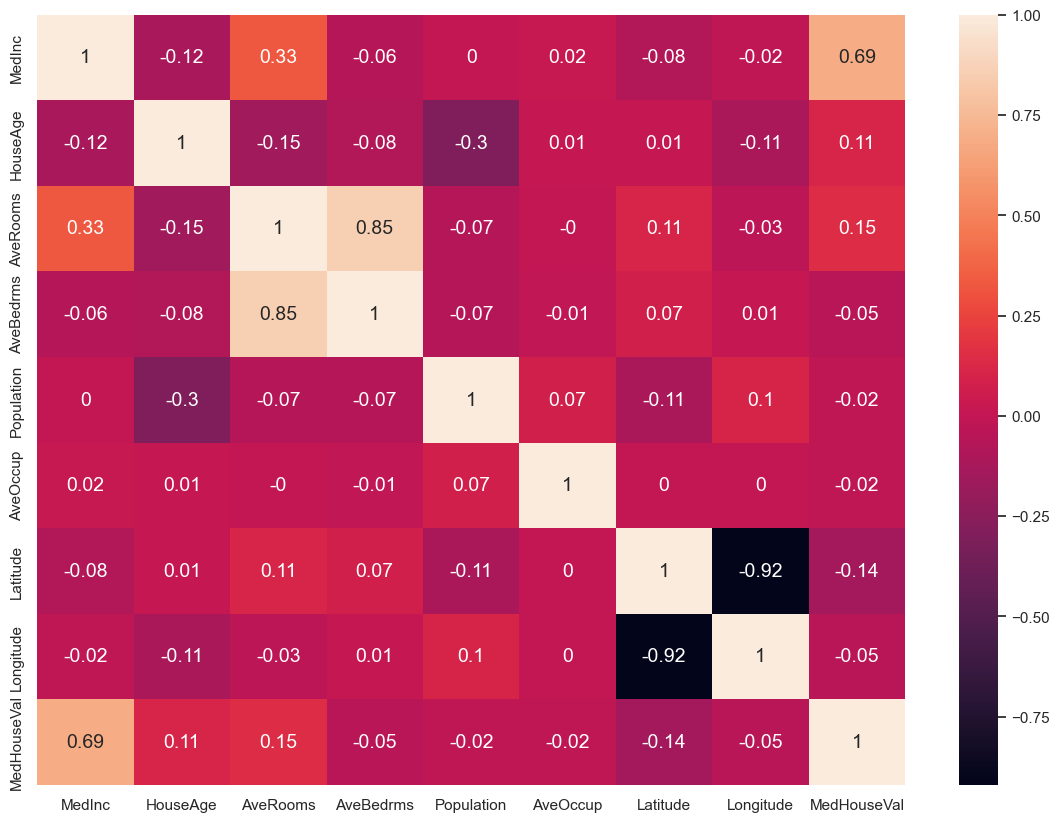

In [154]:
# podemos ver cuál es la relación entre los atributos y los atributos con el target
plt.figure(figsize=(14, 10))
correlacion_med_house_val = df_california.corr().round(2)
sns.heatmap(data=correlacion_med_house_val, annot=True,annot_kws={"size":14})
plt.show()

2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?

# Respuesta:

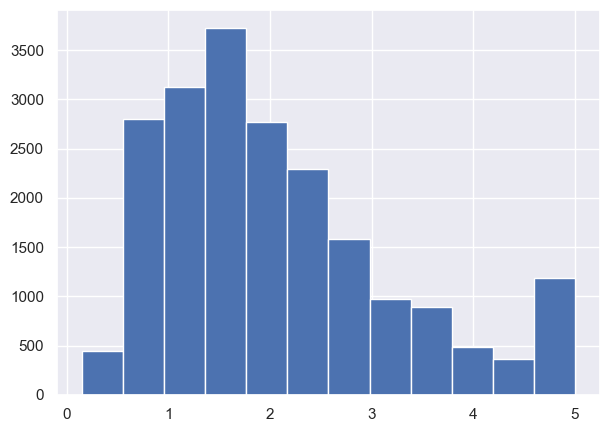

In [155]:
#veamos cual es el histograma del target la media del valor de las casas
plt.figure(figsize=(7,5))
df_california["MedHouseVal"].hist(bins=12)
plt.show()

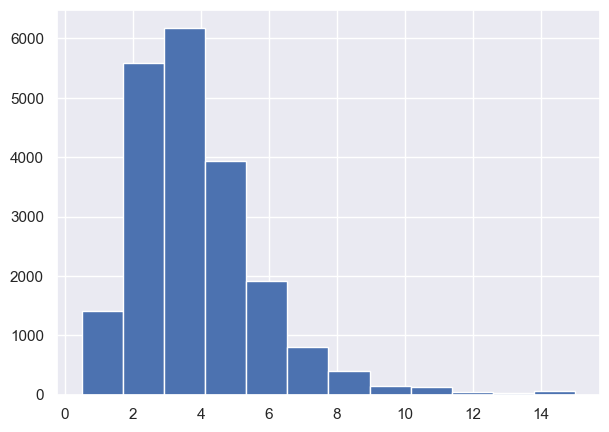

In [156]:
#veamos cual es el histograma de la media de ingresos
plt.figure(figsize=(7,5))
df_california["MedInc"].hist(bins=12)
plt.show()

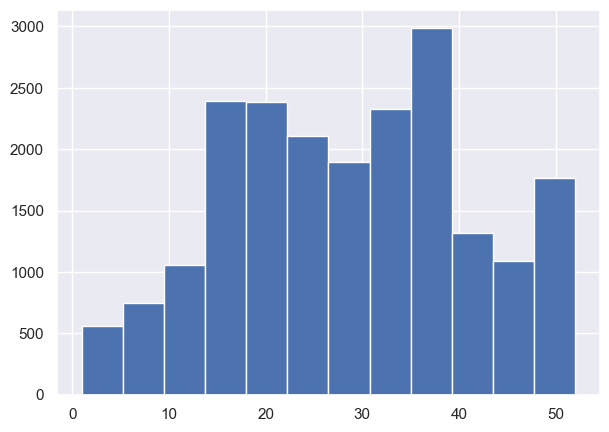

In [157]:
#veamos cual es el histograma de la edad mediana de las casas en el bloque
plt.figure(figsize=(7,5))
df_california["HouseAge"].hist(bins=12)
plt.show()

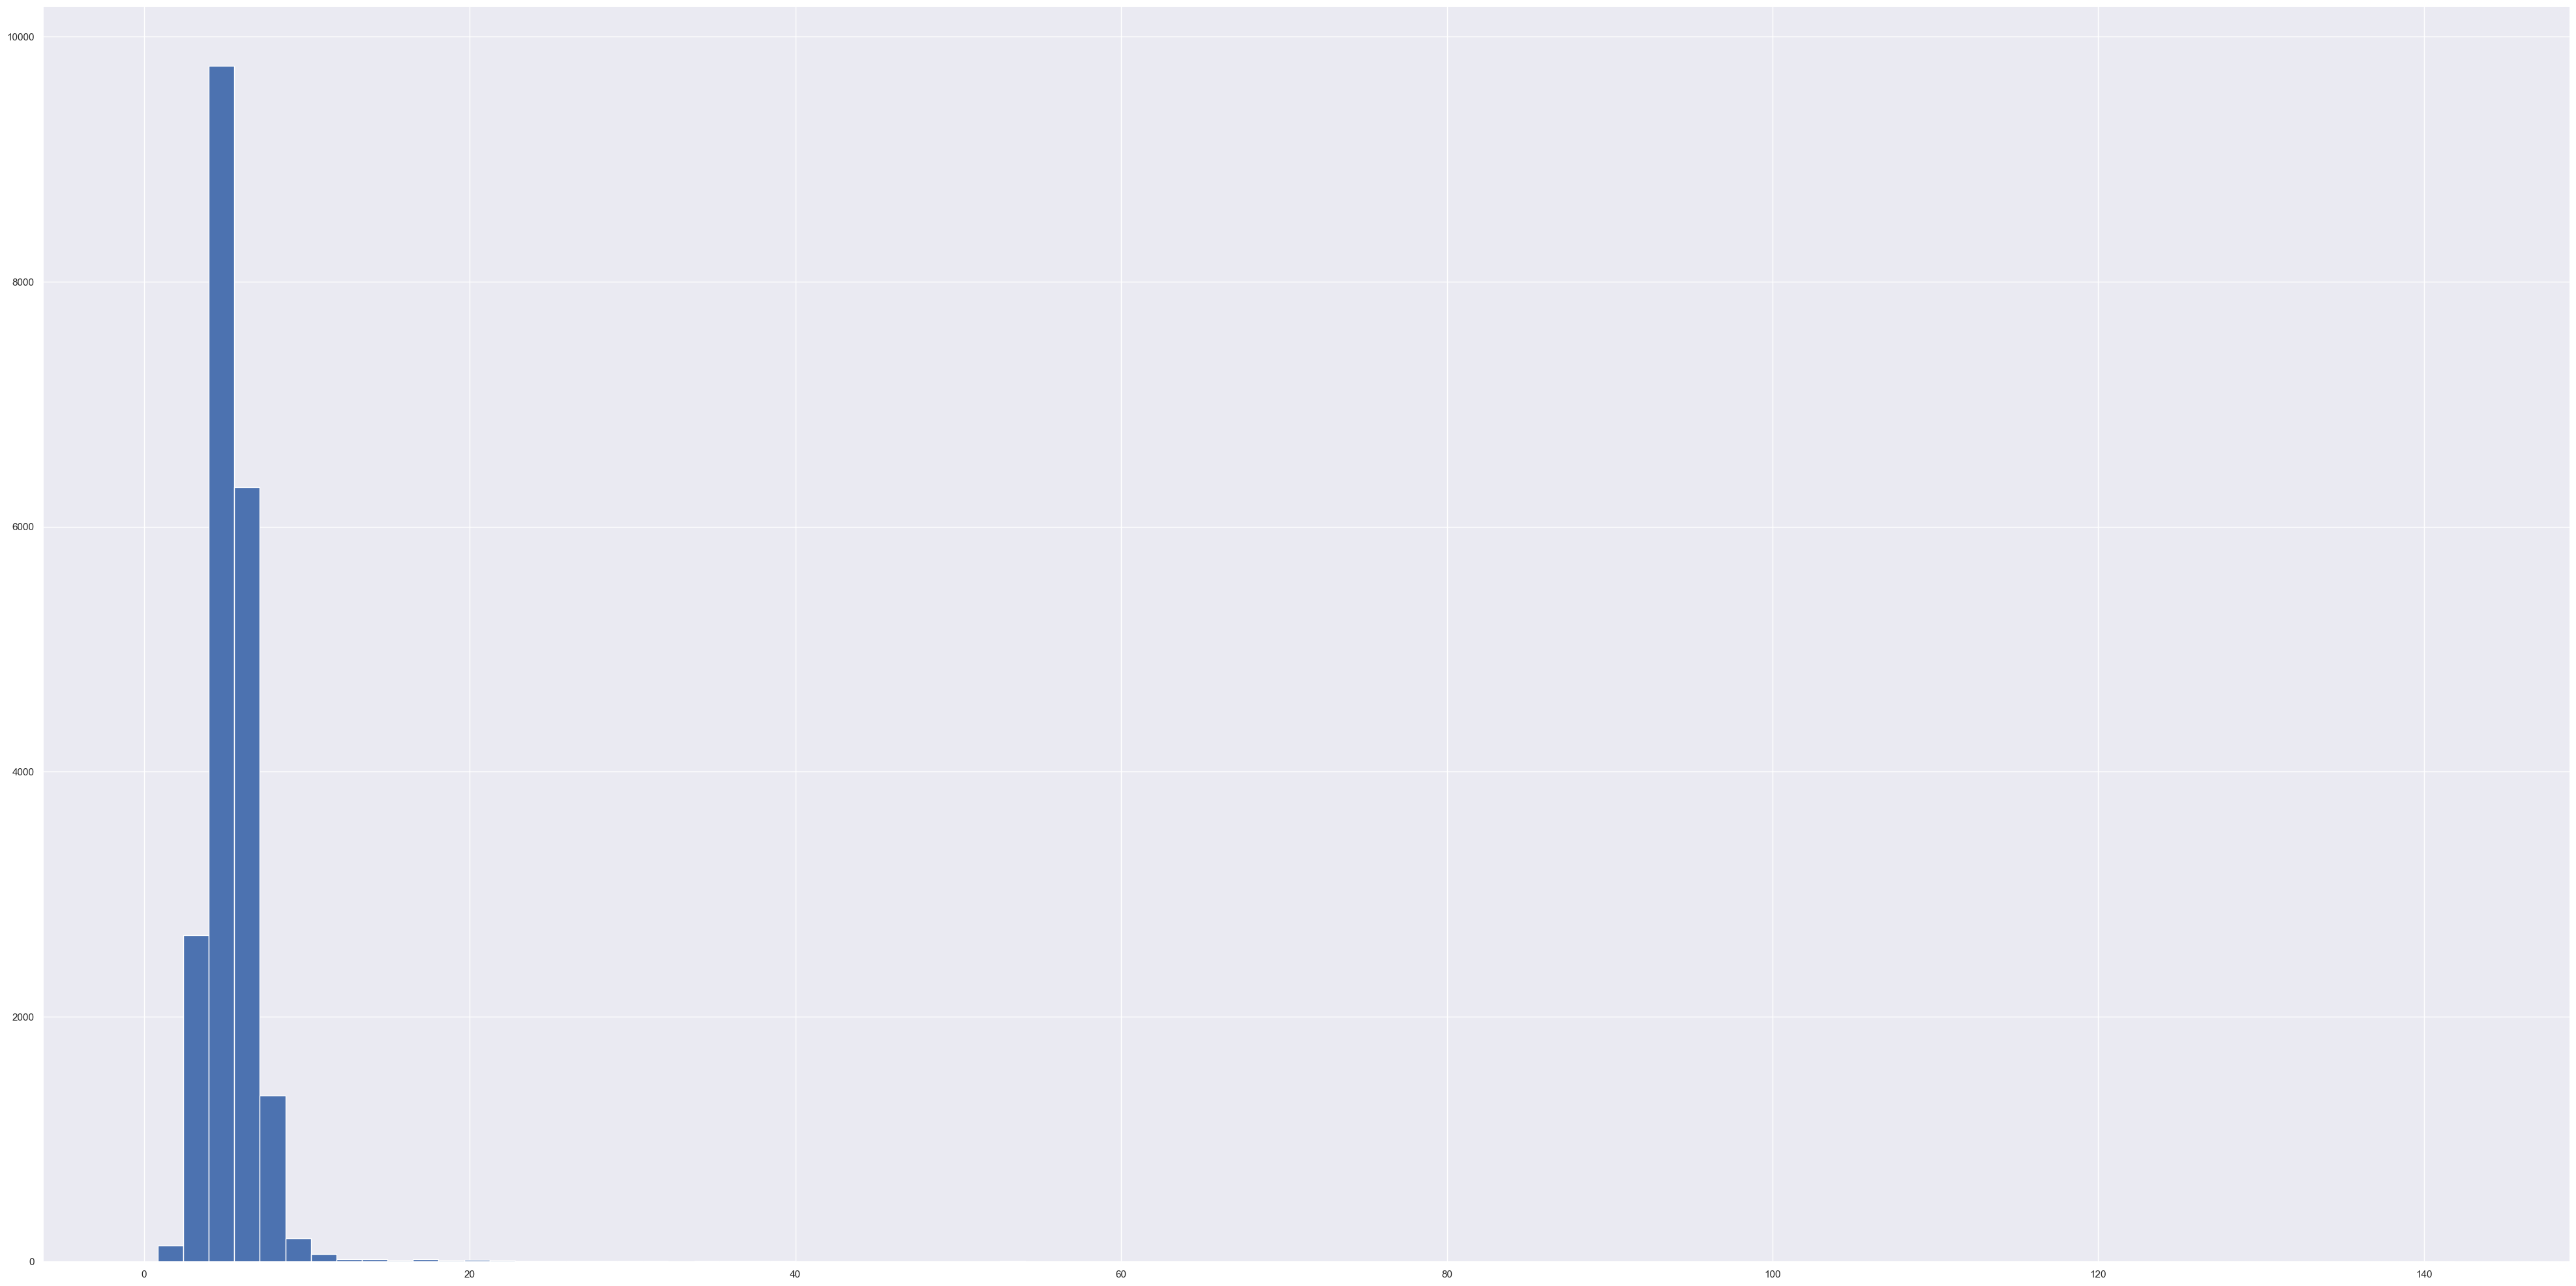

In [158]:
# Histograma AveRooms: Número promedio de habitaciones por hogar

plt.figure(figsize=(50,25))
df_california["AveRooms"].hist(bins=90)
plt.show()

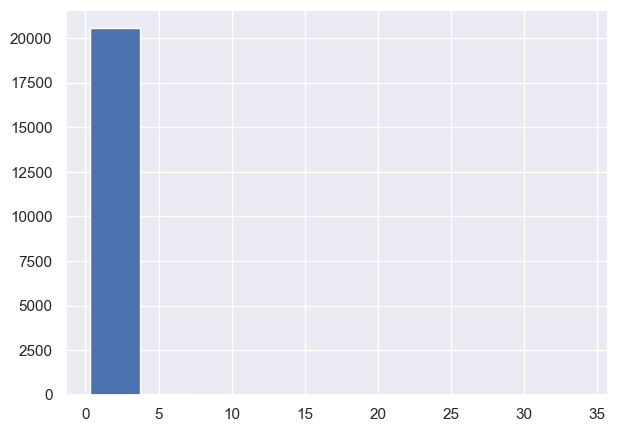

In [159]:
# Histograma AveBedrms: Número promedio de habitaciones por hogar

plt.figure(figsize=(7,5))
df_california["AveBedrms"].hist(bins=10)
plt.show()

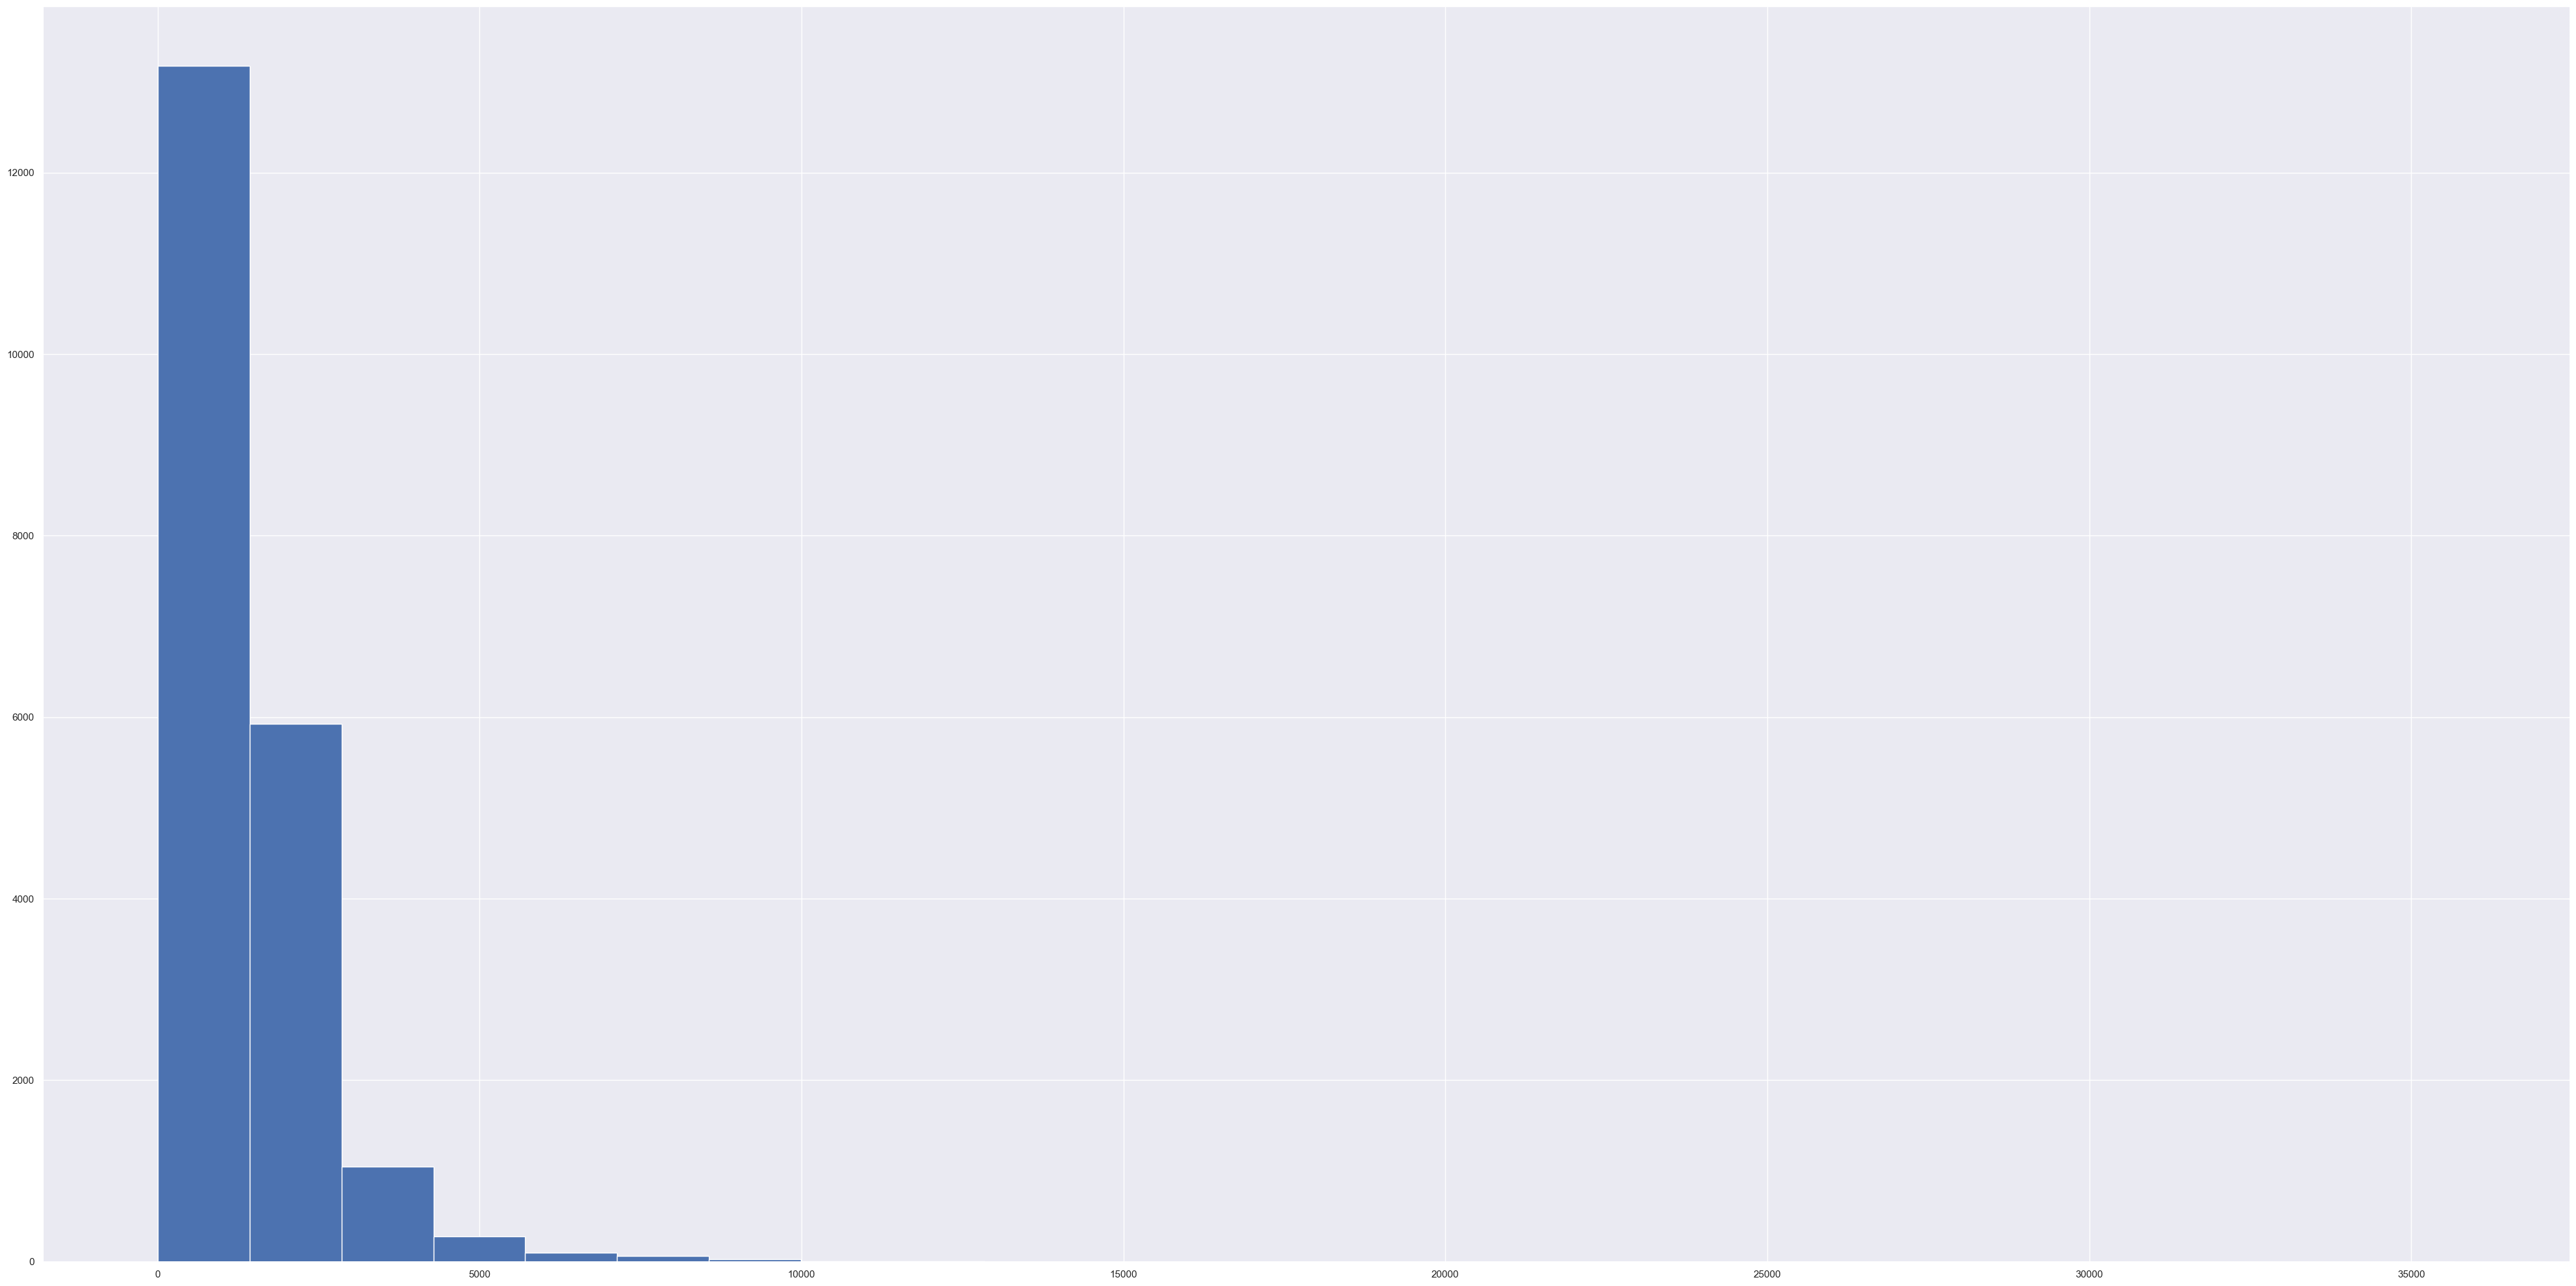

In [160]:
#Histograna de `Population`: Población del bloque
plt.figure(figsize=(50,25))
df_california["Population"].hist(bins=25)
plt.show()

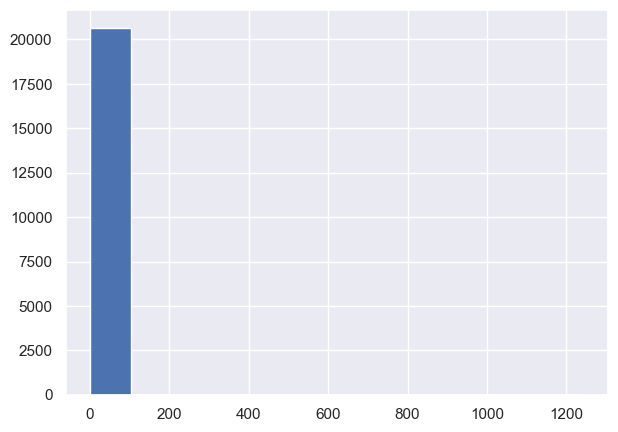

In [161]:
# Histograma de `AveOccup`: Número promedio de miembros por hogar.
plt.figure(figsize=(7,5))
df_california["AveOccup"].hist(bins=12)
plt.show()

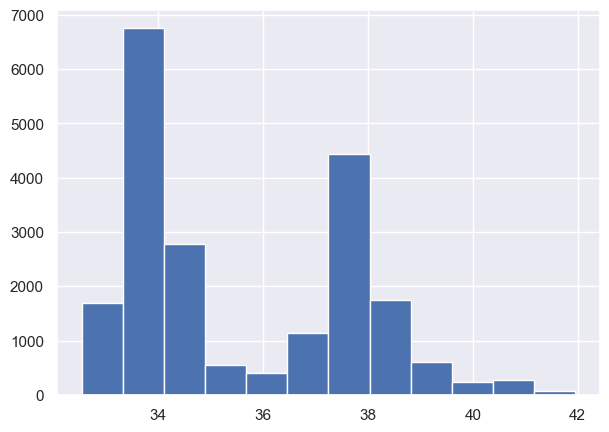

In [162]:
# Histograma `Latitude`: Latitud del bloque
plt.figure(figsize=(7,5))
df_california["Latitude"].hist(bins=12)
plt.show()

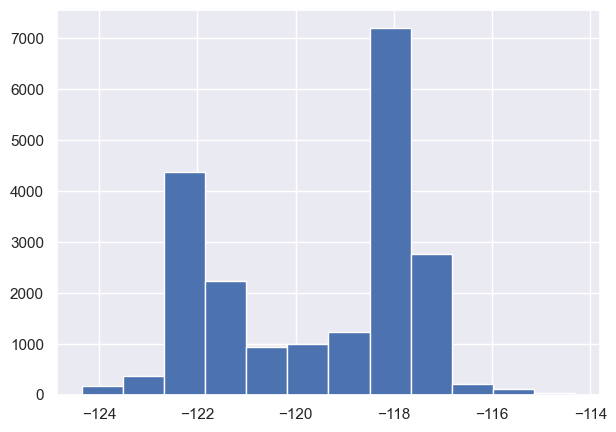

In [163]:
# Histograma `Longitude`: Longitud del bloque
plt.figure(figsize=(7,5))
df_california["Longitude"].hist(bins=12)
plt.show()

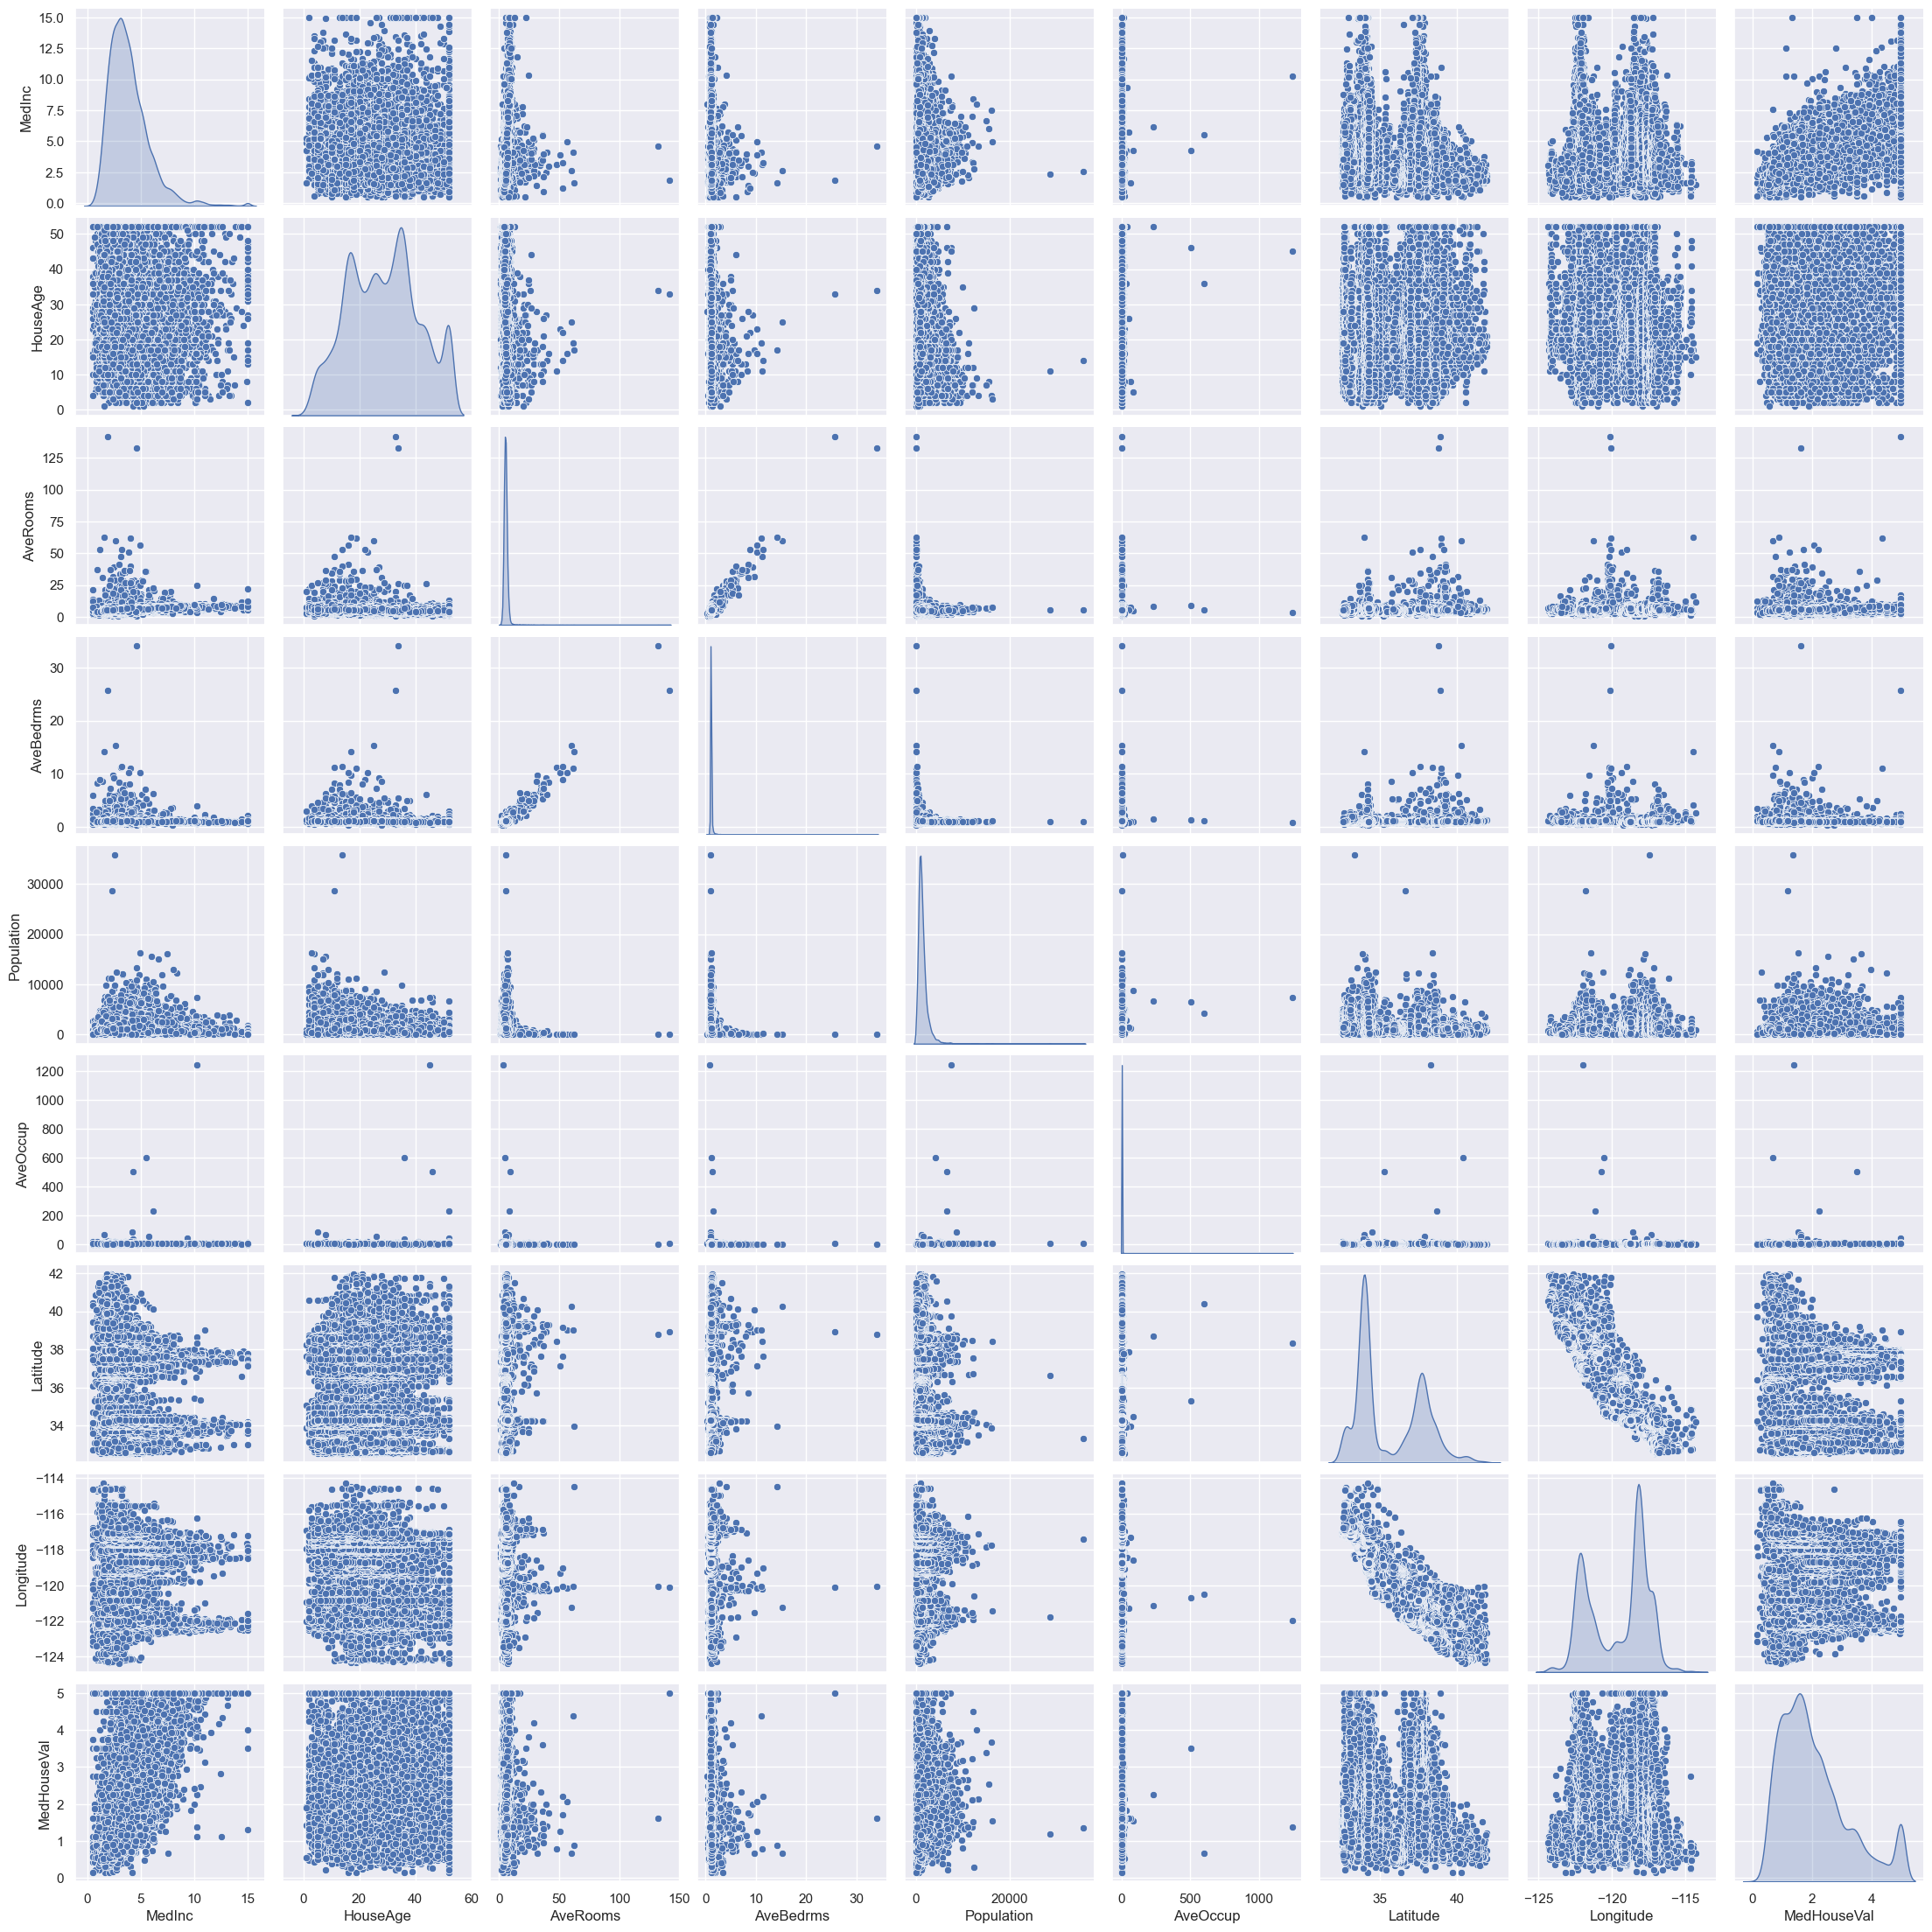

In [168]:
sns.pairplot(data=df_california,diag_kind="kde")

3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del 
modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su 
respuesta.

# Respuesta:

In [165]:
# Aplicamos la regresión 
#Arrancamos un dataframes con los features
X = df_california.drop(columns='MedHouseVal')

# y con la variable depnendiente taget
y = df_california['MedHouseVal']

In [166]:
#Separamos nuestro dataset en entrenamiento y testeto
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [169]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


In [174]:
print (f"La media del escalador es {scaler.mean_ }")

La media del escalador es [ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]


In [175]:
regresion = LinearRegression()
regresion.fit(X_train_scaled,y_train)

print (f"El valor de la intersección de la recta será: {regresion.intercept_}")
print (f"El valor de los coeficientes de la recta será: {regresion.coef_}")

El valor de la intersección de la recta será: 2.0692396089424165
El valor de los coeficientes de la recta será: [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [176]:
#El coeficiente de Pearson
print(f"El coeficiente de Pearson es: {regresion.score(X_train_scaled,y_train)}")

El coeficiente de Pearson es: 0.6093459727972159


In [178]:
#Calculamos el desvío standar del modelo
std_dev_model=np.sqrt((np.sum((y_train-regresion.predict(X_train_scaled))**2/(y_train.size-6))))

print (f"El desvío standar del modelo {std_dev_model}")

El desvío standar del modelo 0.7235848673999719


In [179]:
#El desvío standar respecto a la escala del target
print(f"El desvío estándar del label {np.std(y_train)}")

El desvío estándar del label 1.157452365098417


In [200]:
#Obtenemos las predeicciones del modelo
y_pred=regresion.predict(X_test_scaled)

r2=r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#FALTA TERMINAR EL PUNTO 3

print(f"R-cuadrado {r2}")
print (f"MAE {mae}")
print (f"MSE {mse}")
print (f"RMSE {rmse}")


R-cuadrado 0.5957702326061662
MAE 0.5272474538305953
MSE 0.5305677824766754
RMSE 0.7284008391515453
